age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object

 Model Performance:

                           MAE         RMSE        R²
Random Forest      2349.802857  4368.578522  0.854746
Linear Regression  3840.296085  5603.185059  0.761045
Lasso Regression   3840.293799  5603.185155  0.761045
Ridge Regression   3841.916138  5603.974987  0.760977


/tmp/ipython-input-4044003792.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")


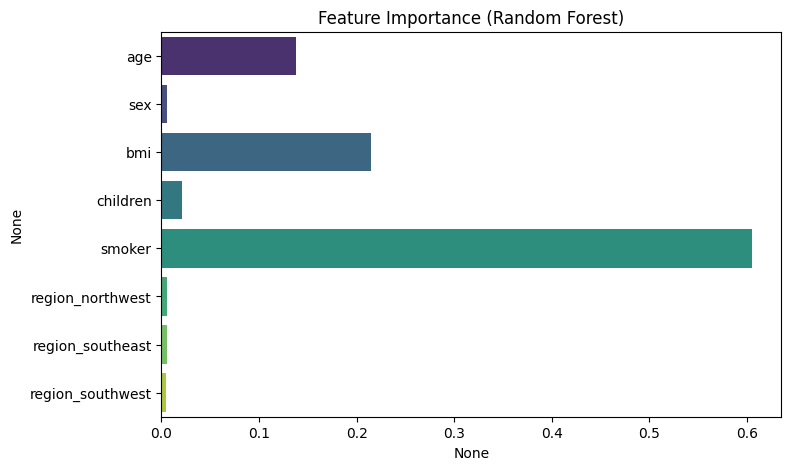

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# 1. Load Dataset

df = pd.read_csv("cleaned_insurance.csv")


# 2. Encode Categorical Features
df["sex"] = df["sex"].map({"male": 1, "female": 0})
df["smoker"] = df["smoker"].map({"yes": 1, "no": 0})


df = pd.get_dummies(df, columns=["region"], drop_first=True)


print(df.dtypes)


# 3. Features & Target

X = df.drop("charges", axis=1)
y = df["charges"]


# 4. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 5. Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 6. Models to Compare
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

results_df = pd.DataFrame(results).T.sort_values("R²", ascending=False)
print("\n Model Performance:\n")
print(results_df)

# 8. Feature Importance (Random Forest)
rf_model = models["Random Forest"]
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)

plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.show()
